In [ ]:
cd /content/drive/MyDrive/cnn_model

/content/drive/MyDrive/cnn_model


In [ ]:
ls

cnn_bike_car_dataset/  cnn_bike_car_dataset.zip


In [ ]:
!unzip cnn_bike_car_dataset.zip

Archive:  cnn_bike_car_dataset.zip
  inflating: cnn_bike_car_dataset/bikes/032adc41976635.Y3JvcCwxNjIxLDEyNjksMjc0NiwxOTA1.jpg  
replace cnn_bike_car_dataset/bikes/1-500x500.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: cnn_bike_car_dataset/bikes/1-500x500.png  
  inflating: cnn_bike_car_dataset/bikes/1-500x5002.png  
  inflating: cnn_bike_car_dataset/bikes/192px.svg  
  inflating: cnn_bike_car_dataset/bikes/1bbfde33c3e774b5029f518bd1a12a0e.jpg  
  inflating: cnn_bike_car_dataset/bikes/2-500x500.png  
  inflating: cnn_bike_car_dataset/bikes/2-500x5002.png  
  inflating: cnn_bike_car_dataset/bikes/3-500x500.png  
  inflating: cnn_bike_car_dataset/bikes/3-500x5002.png  
  inflating: cnn_bike_car_dataset/bikes/40243804-2_1-mario-butter-biks-cookies-oven-fresh-perfect-with-teacoffee.jpg  
  inflating: cnn_bike_car_dataset/bikes/40243805_1-mario-butter-biks-cookies-oven-fresh-perfect-with-teacoffee.jpg  
  inflating: cnn_bike_car_dataset/bikes/40243807_1-mario-cashew-biks-cook

In [ ]:
cd cnn_bike_car_dataset

/content/drive/MyDrive/cnn_model/cnn_bike_car_dataset


In [ ]:
ls

bikes/  cars/


preprocessing , rescale and removing of small and not supported image format

In [ ]:
import os
import imghdr

In [ ]:
for classes in os.listdir(os.getcwd()):
  print(classes)
  for image in os.listdir(os.path.join(os.path.join(os.getcwd(),classes))):
    full_path=os.path.join(os.getcwd(),classes,image)
    if imghdr.what(full_path) not in ['jpeg','jpg', 'bmp', 'png'] or os.path.getsize(full_path) < 9000:
      os.remove(full_path)
  

bikes
cars


In [ ]:
import tensorflow as tf

In [ ]:
pwd

'/content/drive/MyDrive/cnn_model/cnn_bike_car_dataset'

In [ ]:
dataloding=tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,                # Applaying these all Data Augmentations
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

In [ ]:
new_traning_dataset=train_datagen.flow_from_directory(os.getcwd(),shuffle=True,subset='training',seed=123,target_size=(256, 256),class_mode='binary')

Found 155 images belonging to 2 classes.


In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)


In [ ]:
new_validation_dataset=test_datagen.flow_from_directory(os.getcwd(),shuffle=True,subset='validation',seed=123,target_size=(256, 256),class_mode='binary')

Found 37 images belonging to 2 classes.


In [ ]:
/content/drive/MyDrive/cnn_model/cnn_bike_car_dataset/bikes/3-500x5002.png

In [ ]:
traning_dataset=tf.keras.utils.image_dataset_from_directory(os.getcwd(),shuffle=True,validation_split=0.2,subset='training',seed=123)

Found 192 files belonging to 2 classes.
Using 154 files for training.


In [ ]:
validation_dataset=tf.keras.utils.image_dataset_from_directory(os.getcwd(),shuffle=True,validation_split=0.2,subset='validation',seed=123)

Found 192 files belonging to 2 classes.
Using 38 files for validation.


In [ ]:
class_names=traning_dataset.class_names

In [ ]:
len(traning_dataset)

5

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in new_traning_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

AttributeError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
for image_batch, labels_batch in traning_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = new_traning_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = new_validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

AttributeError: ignored

In [ ]:
train_ds=train_ds.map(lambda x,y: (x/255,y))


In [ ]:
val_ds=val_ds.map(lambda x,y: (x/255,y))

In [ ]:
import numpy as np

In [ ]:
len(image_batch)

32

In [ ]:
ypred=model.predict(new_validation_dataset)

2/2 [==============================] - 1s 58ms/step


In [ ]:
new_v=new_validation_dataset.labels.reshape(-1,)

In [ ]:
np.count_nonzero(new_v == 1)

18

In [ ]:
np.count_nonzero(new_v == 0)

19

In [ ]:
type(new_v)

numpy.ndarray

In [ ]:
new_p= ypred.round().reshape(-1,)

In [ ]:
np.count_nonzero(new_p == 1)

19

In [ ]:
np.count_nonzero(new_p == 0)

18

In [ ]:
ypred[ypred >= 0.5]

array([0.84159565, 0.978304  , 0.94870394, 0.9994351 , 0.8386092 ,
       0.9428399 , 0.9927457 , 0.7677268 , 0.99416405, 0.99435294,
       0.81087774, 0.9896165 , 0.99050504, 0.9999908 , 0.9684541 ,
       0.97314984, 0.9887605 , 0.94019836, 0.9907177 ], dtype=float32)

In [ ]:
image_batch, labels_batch = next(iter(train_ds))
print(len(image_batch))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image),sep='\n')

26
0.0
1.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,AveragePooling2D

In [ ]:
Conv2D()

In [ ]:
new_traning_dataset.next()

(array([[[[3.31160687e-02, 1.56868137e-02, 8.71489570e-03],
          [6.33410588e-02, 4.37332168e-02, 2.80469451e-02],
          [7.45098069e-02, 5.49019650e-02, 3.92156877e-02],
          ...,
          [4.53755483e-02, 4.47658589e-04, 0.00000000e+00],
          [4.31372561e-02, 0.00000000e+00, 0.00000000e+00],
          [8.35003555e-02, 2.69087311e-02, 3.36359139e-03]],
 
         [[3.32233869e-02, 1.57833993e-02, 8.76855478e-03],
          [6.33947253e-02, 4.37868796e-02, 2.81006023e-02],
          [7.45098069e-02, 5.49019650e-02, 3.92156877e-02],
          ...,
          [4.53218929e-02, 4.36926930e-04, 0.00000000e+00],
          [4.31372561e-02, 0.00000000e+00, 0.00000000e+00],
          [8.36291313e-02, 2.69945841e-02, 3.37432302e-03]],
 
         [[3.33307013e-02, 1.58799831e-02, 8.82221293e-03],
          [6.34483844e-02, 4.38405350e-02, 2.81542614e-02],
          [7.45098069e-02, 5.49019650e-02, 3.92156877e-02],
          ...,
          [4.52682339e-02, 4.26195300e-04, 0.0000

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(8, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(AveragePooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(AveragePooling2D())
# model.add(Conv2D(64, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
# logdir='logs'
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(new_traning_dataset, epochs=50, validation_data=new_validation_dataset,callbacks=[callback])

Epoch 1/50
1/5 [=====>........................] - ETA: 6s - loss: 0.6965 - accuracy: 0.5625

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5/5 [==============================] - 7s 1s/step - loss: 0.7279 - accuracy: 0.5419 - val_loss: 0.6929 - val_accuracy: 0.4865
Epoch 2/50
5/5 [==============================] - 5s 977ms/step - loss: 0.6909 - accuracy: 0.4903 - val_loss: 0.6913 - val_accuracy: 0.4865
Epoch 3/50
5/5 [==============================] - 4s 791ms/step - loss: 0.6932 - accuracy: 0.4903 - val_loss: 0.6931 - val_accuracy: 0.4865
Epoch 4/50
5/5 [==============================] - 4s 787ms/step - loss: 0.6933 - accuracy: 0.4903 - val_loss: 0.6930 - val_accuracy: 0.4865
Epoch 5/50
5/5 [==============================] - 4s 779ms/step - loss: 0.6933 - accuracy: 0.4903 - val_loss: 0.6911 - val_accuracy: 0.4865


In [ ]:
model.evaluate(new_validation_dataset)

2/2 [==============================] - 1s 33ms/step - loss: 0.6911 - accuracy: 0.4865


[0.6910780072212219, 0.4864864945411682]

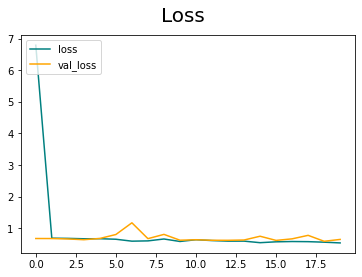

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

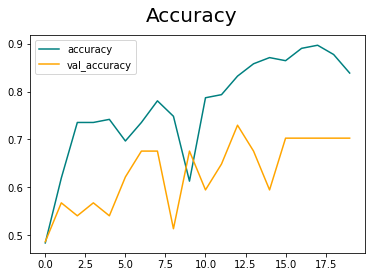

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
total1=[]
total2=[]
for classes in os.listdir(os.getcwd()):
  if classes=='bikes':
    for image in os.listdir(os.path.join(os.path.join(os.getcwd(),classes))):
      full_path=os.path.join(os.getcwd(),classes,image)
      total1.append(full_path)
  elif classes=='cars':
    for image in os.listdir(os.path.join(os.path.join(os.getcwd(),classes))):
      full_path=os.path.join(os.getcwd(),classes,image)
      total2.append(full_path)



In [ ]:
98+94

192

In [ ]:
len(total1),len(total2)

(98, 94)

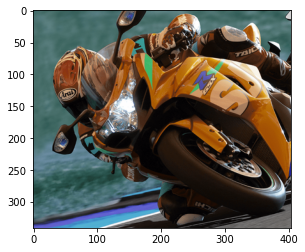

In [ ]:
img = cv2.imread('/content/drive/MyDrive/cnn_model/cnn_bike_car_dataset/bikes/3-500x5002.png')
plt.imshow(img)
plt.show()

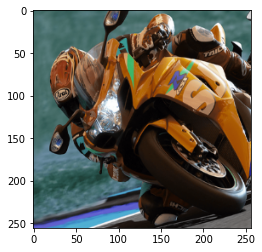

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 82ms/step


In [ ]:
yhat

array([[0.21151857]], dtype=float32)

In [ ]:
import cv2

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is bike')
else:
    print(f'Predicted class is car')

Predicted class is car


In [ ]:
len(total2)

94

In [ ]:
  for image in os.listdir(os.path.join(os.getcwd(),classes))
  for image in os.path.join(os.getcwd(),classes,image)

SyntaxError: ignored